# Data extraction

![texto alternativo](https://worldview.stratfor.com/sites/default/files/styles/article_full/public/cryptocurrency-gulf-display-shutterstock-1028639176.png?itok=K36RQG5A.jpg)

## Extracting (web scraping) daily data from top 200 cryptocurrencies available at  https://coinmarketcap.com/coins/ but also you can find more datasets with data by hour at https://www.cryptodatadownload.com/data/

Is important to run all libraries to solve possible issues first and avoid the environment restarting 

In [4]:
# ► First libs

import plotly.express as px 
import pandas as pd
import re

# ► More libs for the function

import datetime 
import csv

In [3]:
# ► For prophet model (Time series)

import fbprophet
import matplotlib.pyplot as plt

In [2]:
# ► For PyCaret model (Regression models)

!pip install pycaret==2.0
#from pycaret.regression import *  # we will rin this line then

In [1]:
# ► For arima model (Time series)

#!pip install pmdarima
from pmdarima.arima import auto_arima
from scipy import stats
from itertools import product
import warnings
import statsmodels.api as sm

In [5]:
# ► Scraping main table wit pandas

url = 'https://coinmarketcap.com/coins/views/all/'
df = pd.read_html(url)[2]
df.head()

,Rank,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24h),% 1h,% 24h,% 7d,Unnamed: 10
0,1,Bitcoin,BTC,"$214,540,802,816","$11,616.68","18,468,337 BTC","$18,874,635,335",-0.20%,0.96%,-2.20%,NaN
1,2,Ethereum,ETH,"$43,833,482,092",$390.35,"112,293,958 ETH","$9,254,408,779",-0.38%,0.99%,-9.04%,NaN
2,3,XRP,XRP,"$12,703,754,151",$0.282666,"44,942,589,751 XRP *","$1,273,959,028",-0.44%,1.41%,-5.86%,NaN
3,4,Bitcoin Cash,BCH,"$5,237,813,171",$283.17,"18,497,300 BCH","$1,128,641,083",-0.39%,-0.10%,-7.68%,NaN
4,5,Litecoin,LTC,"$3,847,353,252",$58.92,"65,295,824 LTC","$2,114,876,738",-0.50%,-0.19%,-3.77%,NaN


In [6]:
# ► Getting rid of '$,' simbols

df.Price = df['Price'].apply(lambda x: float(re.sub('([$,]*)','',x)))
df.sort_values(by=['Price'], inplace=True, ascending=False)

In [7]:
# ► Below Bitcoin is omitted because its price is too high to appreciate the rest of the coins

fig = px.bar(df[1:], y='Price', x='Name', text='Name')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(template='seaborn', title='Coins available for scraping')
fig.show()

In [8]:
coins_available = list(df.Name)

In [9]:
# ► Repacing ' ' and '.' for '-' and deleting '[]#'  

coins_available = [re.sub('([\s+.])','-',coin.lower()).replace('[','').replace(']','').replace('#','') for coin in coins_available]

In [10]:
print(coins_available)

['bitcoin', 'ethereum', 'bitcoin-cash', 'bitcoin-sv', 'monero', 'dash', 'bitcoinpos', 'zcash', 'unobtanium', 'litecoin', 'bonorum', 'obyte', 'binance-coin', 'counos-x', 'decred', 'salus', 'neo', 'kusama', 'energy-web-token', 'bitcoin-gold', 'largo-coin', 'horizen', 'newyork-exchange', 'cosmos', 'ethereum-classic', 'zcoin', 'chainx', 'counos-coin', 'mimblewimblecoin', 'platincoin', 'bitcoinhd', 'ddkoin', 'qtum', 'tezos', 'waves', 'eos', 'solana', 'ghostprism', 'btse', 'vitae', 'elastos', 'celo', 'zenon', 'zynecoin', 'monacoin', 'lisk', 'factom', 'hypercash', 'cryptonex', 'energi', 'serum', 'haven-protocol', 'blocknet', 'nano', 'tomochain', 'ergo', 'stakecubecoin', 'dero', 'komodo', 'deviantcoin', 'ontology', 'polis', 'bitcoin-diamond', 'particl', 'gxchain', 'bhpcoin', 'baer-chain', 'skycoin', 'stratis', 'neblio', 'icon', 'insolar', 'darma-cash', 'fusion', 'algorand', 'aeon', 'nebulas', 'ouroboros', 'grin', 'beam', 'bitcoin-2', 'ark', 'loki', 'aidos-kuneen', 'pivx', 'nuls', 'theta', 'ter

## Function to obtain some data coins like 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'.



In [11]:
# ► Function to extract data

def get_data(coins_available):
 
  # ► User types a number

  print(coins_available)
  coin_name = input('Type a valid coin name: ').lower()

  while True:

    if coin_name not in coins_available:
      print('Coin name should not contain spaces instead use "-" and type all in lowercase')
      coin_name = input('Type again a valid coin name: ').lower()
    else:
      break
  
  # ► Scrapping the coin name

  today = datetime.date.today()  # todays date
  mktcap_page = 'https://coinmarketcap.com/currencies/'+ coin_name +'/historical-data/?start=20130428&amp;end='+"{:%Y%m%d}".format(today)
  full_data = pd.read_html(mktcap_page)[2]
  full_data.rename(columns={'Open*': 'Open', 'Close**': 'Close'}, inplace=True)

  # ► This function replaces ',' for nothing and then changes data type from object to float

  def obj_to_num(df,cols):
      
      def obj_to_num(row):
          if ',' in str(row):
            row = row.replace(',','')
            return float(row)
          else:
            return float(row)

      for col in cols:     
          df[col] = df[col].apply(obj_to_num) 

      return df

  # ► This function changes data column type from object to timestamp[ns] and also can changes other columns to float 

  def prepare_data(file):
  
    columns = ['Open','High','Low','Close','Volume','Market Cap']
    file['Date'] = pd.to_datetime(file['Date'])
    num_data = obj_to_num(file,columns)

    return num_data

  return prepare_data(full_data)


## Coin exploration (Ethereum in this case)

You can type any coin (available in the list) to be analized

In [12]:
# ► Type the coin name you want

my_coin = get_data(coins_available)

['bitcoin', 'ethereum', 'bitcoin-cash', 'bitcoin-sv', 'monero', 'dash', 'bitcoinpos', 'zcash', 'unobtanium', 'litecoin', 'bonorum', 'obyte', 'binance-coin', 'counos-x', 'decred', 'salus', 'neo', 'kusama', 'energy-web-token', 'bitcoin-gold', 'largo-coin', 'horizen', 'newyork-exchange', 'cosmos', 'ethereum-classic', 'zcoin', 'chainx', 'counos-coin', 'mimblewimblecoin', 'platincoin', 'bitcoinhd', 'ddkoin', 'qtum', 'tezos', 'waves', 'eos', 'solana', 'ghostprism', 'btse', 'vitae', 'elastos', 'celo', 'zenon', 'zynecoin', 'monacoin', 'lisk', 'factom', 'hypercash', 'cryptonex', 'energi', 'serum', 'haven-protocol', 'blocknet', 'nano', 'tomochain', 'ergo', 'stakecubecoin', 'dero', 'komodo', 'deviantcoin', 'ontology', 'polis', 'bitcoin-diamond', 'particl', 'gxchain', 'bhpcoin', 'baer-chain', 'skycoin', 'stratis', 'neblio', 'icon', 'insolar', 'darma-cash', 'fusion', 'algorand', 'aeon', 'nebulas', 'ouroboros', 'grin', 'beam', 'bitcoin-2', 'ark', 'loki', 'aidos-kuneen', 'pivx', 'nuls', 'theta', 'ter

In [13]:
my_coin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-08-22,389.03,396.47,382.81,395.84,1.013185e+10,4.444892e+10
1,2020-08-21,416.15,418.64,387.44,389.13,1.178180e+10,4.369032e+10
2,2020-08-20,406.76,418.73,404.03,416.44,1.004303e+10,4.675136e+10
3,2020-08-19,423.74,427.02,396.68,406.46,1.313739e+10,4.562586e+10
4,2020-08-18,429.67,432.58,419.67,423.67,1.197898e+10,4.755141e+10


In [14]:
my_coin.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

In [15]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Open'],
                    mode='lines',
                    name='Open'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['High'],
                    mode='lines',
                    name='High'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Low'],
                    mode='lines',
                    name='Low'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Close'],
                    mode='lines',
                    name='Close'))

#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title="Coin behavior from its beginning, price in USD")

fig.show()

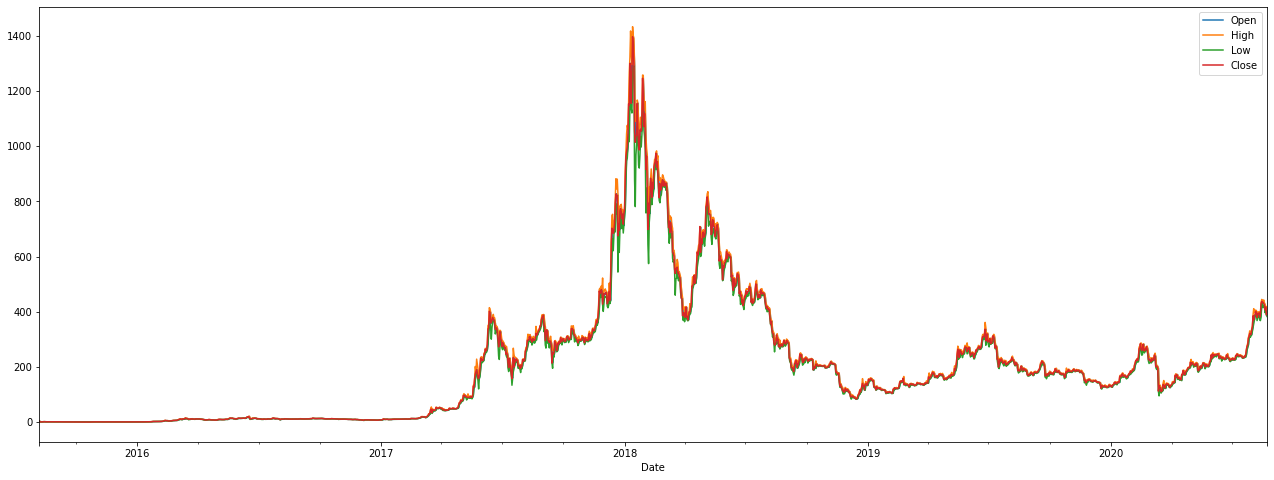

In [16]:
my_coin_graph = my_coin.set_index('Date') 
_ = my_coin_graph[['Open','High','Low','Close']].plot(figsize=(22, 8))

In [17]:
# ► Saving data to csv
my_coin.to_csv('my_coin_daily_data.csv')

## Models

### FbProphet

In [15]:
'''# ► Prophet

import fbprophet
import matplotlib.pyplot as plt'''


In [18]:
# ► Data after 2017-01-01

my_coin_high = my_coin[['High','Date']][my_coin.Date >= '2017-01-01']

In [19]:
# ► Model won't see last 10 days to be compared

my_coin_high_p = my_coin_high[10:]

In [20]:
# ► Renaming columns for Prophet

my_coin_high_p = my_coin_high_p.rename(columns = {'Date':'ds','High':'y'})

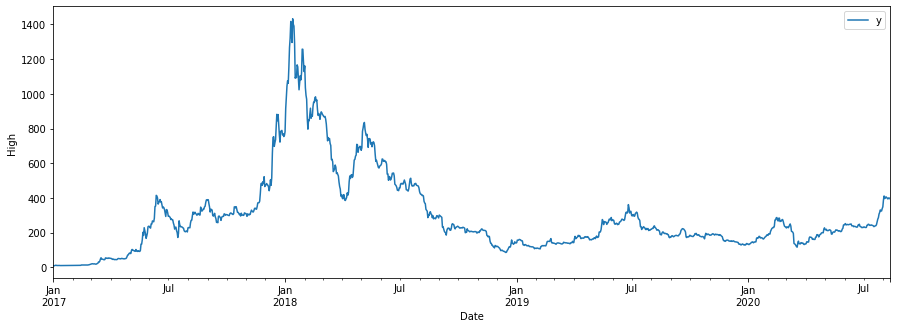

In [21]:
# ► Plot

ax = my_coin_high_p.set_index('ds').plot(figsize=(15, 5))
ax.set_ylabel('High')
ax.set_xlabel('Date')

plt.show()

In [22]:
# ► setting this hyperparameter to 0.8  https://facebook.github.io/prophet/docs/trend_changepoints.html#adjusting-trend-flexibility
# ► 1.1 = mse(2805.25), 0.8 = mse(2857.13), 1.2 = mse(3015.23), 0.75 = mse(3038.22), 0.9 = mse(3039.19), 0.5 = mse(3182.94)   

m = fbprophet.Prophet(changepoint_prior_scale=1.1)

In [23]:
m.fit(my_coin_high_p)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future = m.make_future_dataframe(periods=30)

In [25]:
forecast_p = m.predict(future)

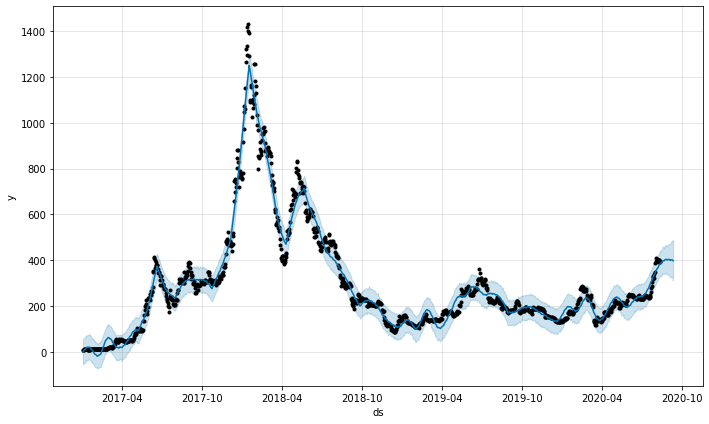

In [26]:
m.plot(forecast_p);

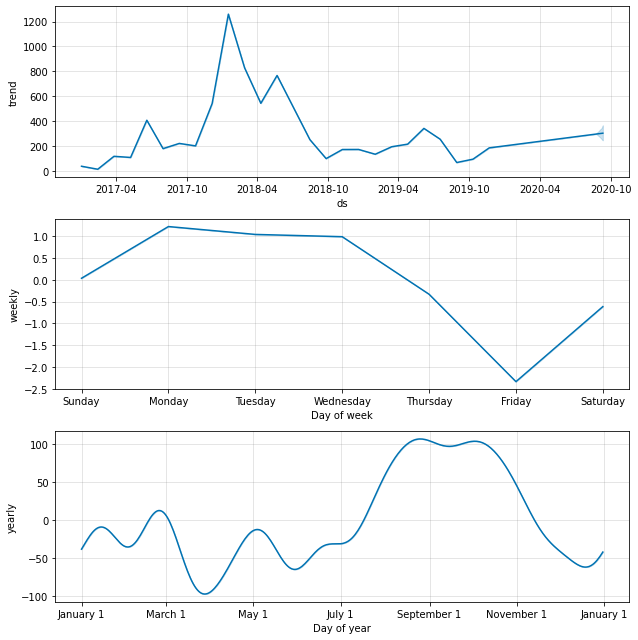

In [27]:
m.plot_components(forecast_p);

In [28]:
# ► predictions and real data

my_coin_inverse = my_coin_high.copy() 
my_coin_inverse.High = my_coin_inverse.High.values[::-1]                        # To change value orders from the original data
my_coin_forecast = pd.concat([forecast_p['ds'],my_coin_inverse['High'],forecast_p['yhat']], axis=1,keys=['date','high','prophet_high'])

In [29]:
# ► The model didn't see this high values

my_coin_forecast[-30:-20]

,date,high,prophet_high
1320,2020-08-13,432.90,385.002730
1321,2020-08-14,444.58,385.302292
1322,2020-08-15,441.75,389.168145
1323,2020-08-16,436.27,391.803274
1324,2020-08-17,442.73,394.810959
1325,2020-08-18,432.58,396.287933
1326,2020-08-19,427.02,397.726687
1327,2020-08-20,418.73,397.730465
1328,2020-08-21,418.64,396.882797
1329,2020-08-22,396.47,399.592812


### Arima

In [30]:
# ► Libraries
'''
!pip install pmdarima
from pmdarima.arima import auto_arima
from scipy import stats
from itertools import product
import warnings
import statsmodels.api as sm'''

'\n!pip install pmdarima\nfrom pmdarima.arima import auto_arima\nfrom scipy import stats\nfrom itertools import product\nimport warnings\nimport statsmodels.api as sm'

In [31]:
# ► Create a copy with values in reverse

my_coin_high_a = (my_coin_high[10:].copy()).set_index('Date').iloc[::-1]


In [32]:
my_coin_high_a.head()

,High
Date,
2017-01-01,8.47
2017-01-02,8.44
2017-01-03,10.00
2017-01-04,11.28
2017-01-05,11.89


In [33]:
# Arima tunning hyperparameters
# Initial approximation of parameters

Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(my_coin_high_a.High, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [34]:
forecast_arima = pd.DataFrame(best_model.predict(start=0, end=len(my_coin_forecast)-1))

In [35]:
forecast_arima = forecast_arima.rename(columns = {0:'arima_high'})

In [36]:
forecast_arima

,arima_high
2017-01-01,0.000000
2017-01-02,9.673193
2017-01-03,9.377621
2017-01-04,10.708148
2017-01-05,12.067468
...,...
2020-09-07,394.235482
2020-09-08,393.889631
2020-09-09,392.220571
2020-09-10,391.868214


In [37]:
# ► Joining data frames

my_coin_forecast_cp = pd.concat([my_coin_forecast.set_index('date'),forecast_arima], axis = 1, sort = False)

In [38]:
# ► Comparing 10 unseen data by both models

my_coin_forecast_cp[-30:-20]

,high,prophet_high,arima_high
2020-08-13,432.90,385.002730,389.678566
2020-08-14,444.58,385.302292,388.074515
2020-08-15,441.75,389.168145,387.779858
2020-08-16,436.27,391.803274,385.715833
2020-08-17,442.73,394.810959,384.986199
2020-08-18,432.58,396.287933,386.918528
2020-08-19,427.02,397.726687,390.512720
2020-08-20,418.73,397.730465,390.291815
2020-08-21,418.64,396.882797,391.165455
2020-08-22,396.47,399.592812,389.847775


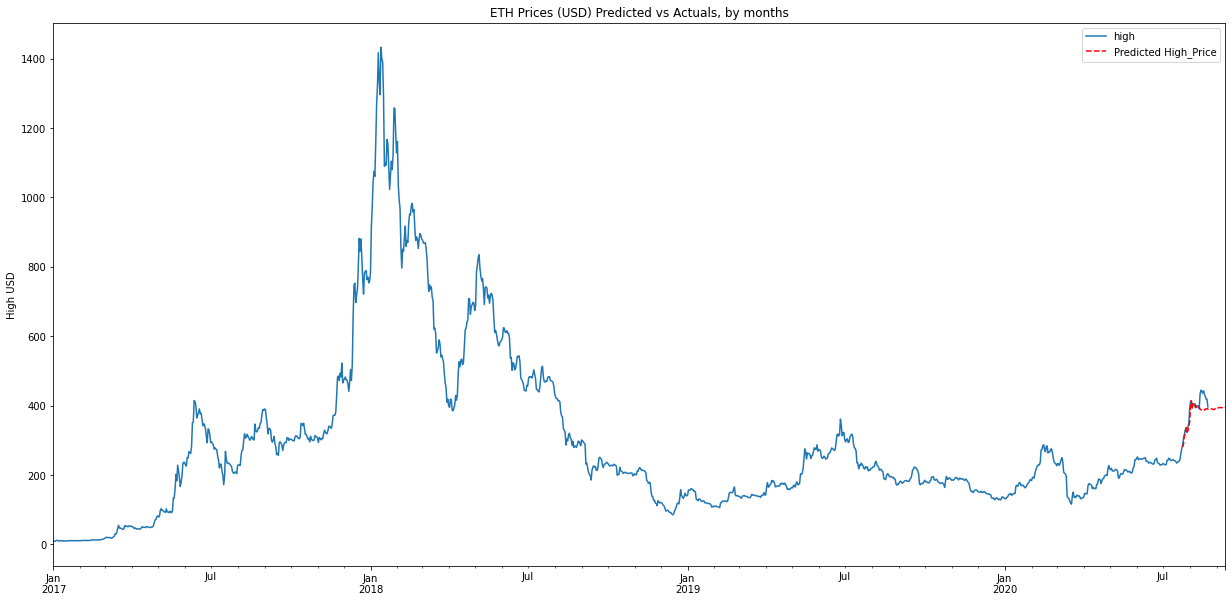

In [39]:
plt.figure(figsize=(21,10))
my_coin_forecast_cp.high.plot()
my_coin_forecast_cp.arima_high[-50:].plot(color='r', ls='--', label='Predicted High_Price')
plt.legend()
plt.title('ETH Prices (USD) Predicted vs Actuals, by months')
plt.ylabel('High USD')
plt.show()

### PyCaret

In [1]:
#!pip install pycaret==2.0

In [40]:
# ► To use regression models

from pycaret.regression import *

In [5]:
#import pandas as pd
#my_coin = pd.read_csv('my_coin_daily_data.csv')
#my_coin['Date'] = pd.to_datetime(my_coin['Date'])

In [49]:
my_coin_high_py = my_coin_forecast_cp.reset_index()

In [52]:
my_coin_high_py = my_coin_high_py[['index','high']][10:]
my_coin_high_py.head()

,index,high
10,2017-01-11,10.66
11,2017-01-12,10.08
12,2017-01-13,9.85
13,2017-01-14,9.89
14,2017-01-15,10.00


In [53]:
exp_reg = setup(data = my_coin_high_py, target = 'high')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,766
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1340, 2)"
4,Missing Values,True
5,Numeric Features,0
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 0
INFO:logs:setup() succesfully completed......................................


In [54]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Elastic Net,161.5200,53180.7757,227.9952,-0.0092,0.9411,1.8461,0.0116
1,Lasso Least Angle Regression,161.6471,53341.3588,228.3246,-0.0120,0.9409,1.8297,0.0117
2,Lasso Regression,161.6117,53148.6380,228.1424,-0.0136,0.9475,1.9505,0.0080
3,Bayesian Ridge,161.8056,53309.7706,228.3813,-0.0140,0.9443,1.8893,0.0172
4,TheilSen Regressor,155.2178,54036.2591,229.3533,-0.0180,0.9222,1.7293,2.1424
5,Orthogonal Matching Pursuit,161.5500,53778.6521,229.4184,-0.0243,0.9458,1.9144,0.0113
6,Ridge Regression,162.4724,53782.1304,229.6024,-0.0283,0.9520,1.9843,0.0093
7,Least Angle Regression,162.5050,53805.9745,229.6574,-0.0289,0.9521,1.9857,0.0169
8,Linear Regression,162.8602,53851.1364,229.8939,-0.0328,0.9513,1.9819,0.0086
9,Support Vector Machine,144.9736,58475.7590,238.5112,-0.1001,0.8800,1.2801,0.0753


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=766, selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [55]:
# ► Creating an ensemble meta-estimator that fits a base regressor on the whole dataset

blender_top3 = blend_models(compare_models(n_select = 3))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,169.1880,65795.6201,256.5066,0.0014,0.8590,1.4227
1,186.7220,83881.2251,289.6226,-0.0011,0.8601,1.2393
2,148.5550,39803.4247,199.5080,0.0122,0.9321,1.9233
3,137.7907,37559.5795,193.8029,0.0057,0.7478,1.0651
4,145.3994,43172.5581,207.7801,0.0158,0.7848,1.2476
5,148.6561,37943.6561,194.7913,-0.0686,1.0231,2.4013
6,151.4927,46799.3414,216.3316,-0.0036,0.9262,1.7856
7,159.4236,46109.0014,214.7301,-0.0282,1.1751,3.0872
8,198.1106,81056.2814,284.7038,-0.0065,1.1224,2.5088
9,168.8085,47808.4048,218.6513,0.0056,0.9926,2.0678


INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 7
INFO:logs:VotingRegressor(estimators=[('Elastic Net_0',
                             ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=766, selection='cyclic',
                                        tol=0.0001, warm_start=False)),
                            ('Lasso Lars_1',
                             LassoLars(alpha=1.0, copy_X=True,
                                       eps=2.220446049250313e-16,
                                       fit_intercept=True, fit_path=True,
                                       jitter=None, max_iter=500,
                                       normalize=True, positive=False,
                      

In [56]:
# ► It does not plot Hyperparams cause is blended model  

evaluate_model(blender_top3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [62]:
# ► Stage of predictions

datat = pd.DataFrame(my_coin_forecast_cp.index).rename(columns={0: "index"})
lr_pred_new = predict_model(blender_top3, data = datat)

In [63]:
lr_pred_new

,index,Label
0,2017-01-01,314.0834
1,2017-01-02,312.5286
2,2017-01-03,316.5015
3,2017-01-04,315.7208
4,2017-01-05,314.0834
...,...,...
1345,2020-09-07,278.8789
1346,2020-09-08,282.8518
1347,2020-09-09,282.0711
1348,2020-09-10,280.4337


In [ ]:
# ► In the last step to compare models, not before cause there are issues with sklearn versions for pmdarima and pycaret 
'''from sklearn.metrics import mean_squared_error as mse
print(mse(my_coin_forecast_cp.high[-30:-20],my_coin_forecast_cp.arima_high[-30:-20]))
print(mse(my_coin_forecast.high[-30:-20],my_coin_forecast.prophet_high[-30:-20]))'''